Deep Learning Assignment 3 

References:
Code source 1: https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632

Code source 2 (TODO: find how to get predictions accuracy): https://www.kaggle.com/code/taronzakaryan/predicting-stock-price-using-lstm-model-pytorch


In [1]:
pip install yfinance

  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
import time
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import torch
import torch.nn as nn
import os
import yfinance as yf
import os, contextlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# folder_path = '/content/drive/MyDrive/deep_learning/'
# print(os.listdir(folder_path))

# hist_dir = folder_path + 'hist'

# if not os.path.exists(hist_dir):
#     print('dir not exists so creating one')
#     os.mkdir(hist_dir)
# else:
#     print('directory exists ', hist_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['assignment_1', 'Assignment 2 Experiments.gsheet', 'Copy of Copy of CVPR-example.doc', 'Assignment 2 Deep Learning Report.gdoc', 'Copy of Deep Learning Assignment 2 - CVPR.docx', 'Copy of Deep Learning Assignment 2 - CVPR oct 28.docx', 'Deep Learning Assignment 2 - CVPR.docx', 'Deep Learning Assignment 3 Notes.gdoc', 'hist']
directory exists  /content/drive/MyDrive/deep_learning/hist


In [47]:
# configs
offset = 0
limit = 3000
period = 'max' # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

# download all NASDAQ traded symbols

# data = pd.read_csv("http://www.nasdaqtrader.com/dynamic/SymDir/nasdaqtraded.txt", sep='|')
# data_clean = data[data['Test Issue'] == 'N']
# symbols = data_clean['NASDAQ Symbol'].tolist()
# print('total number of symbols traded = {}'.format(len(symbols)))



In [48]:
symbols = ['AAPL','AMZN','META']

In [49]:
print(symbols)

['AAPL', 'AMZN', 'META']


In [50]:
limit = limit if limit else len(symbols)
end = min(offset + limit, len(symbols))
is_valid = [False] * len(symbols)
# force silencing of verbose API
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        for i in range(offset, end):
            s = symbols[i]
            data = yf.download(s, period=period)
            if len(data.index) == 0:
                continue
        
            is_valid[i] = True
            file_name = s + ".csv"
            # download_path = os.path.join(root_dir,file_name)
            data.to_csv(file_name)

print('Total number of valid symbols downloaded = {}'.format(sum(is_valid)))

Total number of valid symbols downloaded = 3


In [ ]:
# valid_data = data_clean[is_valid]
# valid_data.to_csv('symbols_valid_meta.csv', index=False)



In [ ]:
# !mkdir stocks
# !mkdir etfs

In [ ]:
# etfs = valid_data[valid_data['ETF'] == 'Y']['NASDAQ Symbol'].tolist()
# stocks = valid_data[valid_data['ETF'] == 'N']['NASDAQ Symbol'].tolist()

In [ ]:
# import shutil
# from os.path import isfile, join

# def move_symbols(symbols, dest):
#     for s in symbols:
#         filename = '{}.csv'.format(s)
#         shutil.move(join('hist', filename), join(dest, filename))
        
# move_symbols(etfs, "etfs")
# move_symbols(stocks, "stocks")

In [51]:

data = pd.read_csv('AMZN.csv', index_col='Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-10-27,113.919998,114.120003,109.769997,110.959999,110.959999,129605400
2022-10-28,97.910004,103.959999,97.660004,103.410004,103.410004,223133400
2022-10-31,103.559998,104.870003,100.739998,102.440002,102.440002,99251400


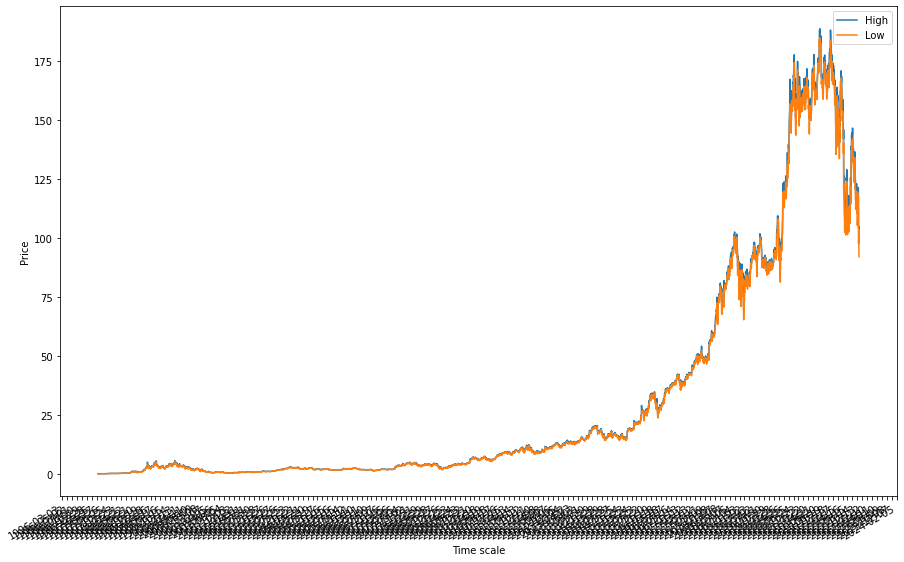

In [52]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in data.index.values]

plt.plot(x_dates, data['High'], label='High')
plt.plot(x_dates, data['Low'], label='Low')
plt.xlabel('Time scale')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [53]:
X_features = data[['Open','High','Low']]
X_features

,Open,High,Low
Date,,,
1997-05-15,0.121875,0.125000,0.096354
1997-05-16,0.098438,0.098958,0.085417
1997-05-19,0.088021,0.088542,0.081250
1997-05-20,0.086458,0.087500,0.081771
1997-05-21,0.081771,0.082292,0.068750
...,...,...,...
2022-10-27,113.919998,114.120003,109.769997
2022-10-28,97.910004,103.959999,97.660004
2022-10-31,103.559998,104.870003,100.739998


In [54]:
y_labels = data[['Close']]
y_labels

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2022-10-27,110.959999
2022-10-28,103.410004
2022-10-31,102.440002


In [56]:
# feature scaling
standard_scaler = StandardScaler()
x_scaled = standard_scaler.fit_transform(X_features)
x_df = pd.DataFrame(columns=X_features.columns, data = x_scaled, index = X_features.index)
x_df

,Open,High,Low
Date,,,
1997-05-15,-0.637301,-0.637448,-0.637755
1997-05-16,-0.637792,-0.637987,-0.637986
1997-05-19,-0.638010,-0.638202,-0.638075
1997-05-20,-0.638042,-0.638224,-0.638064
1997-05-21,-0.638141,-0.638331,-0.638340
...,...,...,...
2022-10-27,1.743699,1.720402,1.687035
2022-10-28,1.408721,1.510255,1.430335
2022-10-31,1.526936,1.529077,1.495623


In [ ]:

# def split_data(stock, lookback):
#     data_raw = stock.to_numpy() # convert to numpy array
#     data = []
    
#     # create all possible sequences of length seq_len
#     for index in range(len(data_raw) - lookback): 
#         data.append(data_raw[index: index + lookback])
    
#     data = np.array(data);
#     test_set_size = int(np.round(0.2*data.shape[0]));
#     train_set_size = data.shape[0] - (test_set_size);
    
#     x_train = data[:train_set_size,:-1,:]
#     y_train = data[:train_set_size,-1,:]
    
#     x_test = data[train_set_size:,:-1]
#     y_test = data[train_set_size:,-1,:]
    
#     return [x_train, y_train, x_test, y_test]

# lookback = 20 # choose sequence length
# x_train, y_train, x_test, y_test = split_data(price, lookback)

In [57]:
def split_data_into_steps(data_to_split, steps):
    X = []
    y = []
    for i in range(len(data_to_split) - steps + 1):
        X.append(data_to_split[i:i + steps, :-1])
        y.append(data_to_split[i + steps - 1, -1])

    return np.array(X), np.array(y)

In [58]:
def split_data_into_train_test(X, y, split_size, date_index):
    split_idx = int(np.ceil(len(X) * split_size))
    
    X_train = X[:split_idx]
    X_test = X[split_idx:]
    y_train = y[:split_idx].reshape(-1,1)
    y_test = y[split_idx:].reshape(-1,1)

    X_train_date = date_index[:split_idx]
    X_test_date = date_index[split_idx:]

    return X_train, X_test, y_train, y_test, X_train_date, X_test_date

In [59]:
X,y = split_data_into_steps(data.values, 2)
X_train, X_test, y_train, y_test, X_train_date, X_test_date = split_data_into_train_test(X, y, 0.8, data.index)
print('X.shape ', X.shape)
print('X_train.shape ', X_train.shape)
print('X_test.shape ', X_test.shape)
print('y_train.shape ', y_train.shape)
print('y_test.shape ', y_test.shape)

X.shape  (6410, 2, 5)
X_train.shape  (5128, 2, 5)
X_test.shape  (1282, 2, 5)
y_train.shape  (5128, 1)
y_test.shape  (1282, 1)


In [60]:

x_train = torch.from_numpy(X_train).type(torch.Tensor)
x_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [61]:
print(x_train.shape)
# print(x_train)

torch.Size([5128, 2, 5])


In [62]:
def train_network(num_epochs, model, criterion, optimiser, x_train, y_train):
    hist = np.zeros(num_epochs)
    start_time = time.time()
    lstm = []
    for t in range(num_epochs):
        y_train_pred = model(x_train)
        loss = criterion(y_train_pred, y_train)
        print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))

In [63]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        print('out shape ', out.shape)
        out = self.fc(out[:, -1, :]) 
        return out

In [64]:
input_dim = X_train.shape[2]
print('input_dim ', input_dim)
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 10
model_lstm = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model_lstm.parameters(), lr=0.01)
train_network(num_epochs, model_lstm, criterion, optimiser, x_train, y_train_lstm)

input_dim  5
out shape  torch.Size([5128, 2, 32])
Epoch  0 MSE:  4.797798015198822e+16
out shape  torch.Size([5128, 2, 32])
Epoch  1 MSE:  4.797798015198822e+16
out shape  torch.Size([5128, 2, 32])
Epoch  2 MSE:  4.797798015198822e+16
out shape  torch.Size([5128, 2, 32])
Epoch  3 MSE:  4.797798015198822e+16
out shape  torch.Size([5128, 2, 32])
Epoch  4 MSE:  4.797798015198822e+16
out shape  torch.Size([5128, 2, 32])
Epoch  5 MSE:  4.797798015198822e+16
out shape  torch.Size([5128, 2, 32])
Epoch  6 MSE:  4.797798015198822e+16
out shape  torch.Size([5128, 2, 32])
Epoch  7 MSE:  4.797798015198822e+16
out shape  torch.Size([5128, 2, 32])
Epoch  8 MSE:  4.797798015198822e+16
out shape  torch.Size([5128, 2, 32])
Epoch  9 MSE:  4.797798015198822e+16
Training time: 1.4847781658172607


In [65]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [66]:
model_gru = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model_gru.parameters(), lr=0.01)
train_network(num_epochs, model_gru, criterion, optimiser, x_train, y_train_gru)

Epoch  0 MSE:  4.797798015198822e+16
Epoch  1 MSE:  4.797798015198822e+16
Epoch  2 MSE:  4.797798015198822e+16
Epoch  3 MSE:  4.797798015198822e+16
Epoch  4 MSE:  4.797798015198822e+16
Epoch  5 MSE:  4.797798015198822e+16
Epoch  6 MSE:  4.797798015198822e+16
Epoch  7 MSE:  4.797798015198822e+16
Epoch  8 MSE:  4.797798015198822e+16
Epoch  9 MSE:  4.797798015198822e+16
Training time: 1.0876405239105225
